<a href="https://colab.research.google.com/github/alan713/alan1/blob/master/DL_HW_2_2_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# 1. Define transformations for the training and test sets
#    - ToTensor() converts images to PyTorch Tensors.
#    - Normalize() scales the pixel values. The values (0.5, 0.5, 0.5) for mean and std
#      will transform the images from a [0, 1] range to a [-1, 1] range.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Set a batch size for training
batch_size = 64

# 2. Download and load the training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# 3. Download and load the test data
#    (For this assignment, you primarily need the training data to monitor error,
#     but a test set is good practice).
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

print("PyTorch data loaded successfully!")
# The 'trainloader' object is now ready to be used in your training loop.

100%|██████████| 170M/170M [00:02<00:00, 82.2MB/s]


PyTorch data loaded successfully!


In [2]:
import tensorflow as tf
import numpy as np

# 1. Load the dataset directly from Keras
#    This returns two tuples: (training_images, training_labels), (test_images, test_labels)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 2. Normalize the pixel values
#    The original pixel values are in the range [0, 255].
#    We convert them to float and scale them to the [0, 1] range.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Optional but recommended: One-hot encode the labels
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


print("TensorFlow/Keras data loaded and preprocessed successfully!")
# The NumPy arrays 'x_train' and 'y_train' are now ready to be passed
# directly to the model.fit() method in Keras.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
TensorFlow/Keras data loaded and preprocessed successfully!


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_four_layer_cnn(activation_type='relu'):
    """
    Builds a four-layer CNN model using the Keras Sequential API.
    Args:
        activation_type (str): The activation function to use ('relu' or 'tanh').
    Returns:
        A Keras model instance.
    """
    if activation_type.lower() not in ['relu', 'tanh']:
        raise ValueError("Unsupported activation type: choose 'relu' or 'tanh'")

    model = models.Sequential()

    # Layer 1: Convolutional Layer + Activation + Pooling
    # Input shape is 32x32 pixels with 3 channels (RGB)
    model.add(layers.Conv2D(6, (5, 5), activation=activation_type, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Layer 2: Convolutional Layer + Activation + Pooling
    model.add(layers.Conv2D(16, (5, 5), activation=activation_type))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the 3D feature maps to 1D
    model.add(layers.Flatten())

    # Layer 3: Fully-Connected (Dense) Layer + Activation
    model.add(layers.Dense(120, activation=activation_type))

    # Layer 4: Output Layer (Dense)
    # 10 output nodes for the 10 classes. No activation function here,
    # as it's included in the loss function (from_logits=True).
    model.add(layers.Dense(10))

    return model

# --- How to use this function for your experiments ---

# Experiment 1: Create the model with ReLU activations
relu_model_tf = create_four_layer_cnn(activation_type='relu')
print("TensorFlow/Keras model with ReLU created successfully:")
relu_model_tf.summary()

# Experiment 2: Create the model with Tanh activations
tanh_model_tf = create_four_layer_cnn(activation_type='tanh')
print("\nTensorFlow/Keras model with Tanh created successfully:")
tanh_model_tf.summary()

TensorFlow/Keras model with ReLU created successfully:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,202 (203.91 KB)

 Trainable params: 52,202 (203.91 KB)

 Non-trainable params: 0 (0.00 B)


TensorFlow/Keras model with Tanh created successfully:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,202 (203.91 KB)

 Trainable params: 52,202 (203.91 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# --- Assume you have these from previous steps ---
# (x_train, y_train): Your preprocessed CIFAR-10 data
# create_four_layer_cnn: The function to build your model

# --- Step 1: Create a custom callback to log time and check error ---
class TrainingMonitor(tf.keras.callbacks.Callback):
    def __init__(self):
        super(TrainingMonitor, self).__init__()
        self.epoch_times = []
        self.train_errors = []

    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time() # Start timer

    def on_epoch_end(self, epoch, logs=None):
        # Calculate and store epoch time
        epoch_time = time.time() - self.start_time
        self.epoch_times.append(epoch_time)

        # Get training error from logs and store it
        train_accuracy = logs.get('accuracy')
        train_error = 1 - train_accuracy
        self.train_errors.append(train_error)

        print(f"Epoch {epoch + 1}: Training Error: {train_error:.4f}, Time: {epoch_time:.2f}s")

        # The crucial stopping condition from the assignment
        if train_error <= 0.25: #
            print("Stopping training as error rate has reached <= 25%.")
            self.model.stop_training = True

# --- Step 2: Compile and run the experiments ---
# Create and compile the ReLU model
relu_model_tf = create_four_layer_cnn(activation_type='relu')
relu_model_tf.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

# Create and compile the Tanh model
tanh_model_tf = create_four_layer_cnn(activation_type='tanh')
tanh_model_tf.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

# Create instances of our monitor callback
relu_monitor = TrainingMonitor()
tanh_monitor = TrainingMonitor()

# Train the models
print("--- Starting Training for ReLU model ---")
relu_model_tf.fit(x_train, y_train, batch_size=64, epochs=100, callbacks=[relu_monitor])

print("\n--- Starting Training for Tanh model ---")
tanh_model_tf.fit(x_train, y_train, batch_size=64, epochs=100, callbacks=[tanh_monitor])

# --- Retrieve results from the callbacks ---
relu_errors = relu_monitor.train_errors
relu_times = relu_monitor.epoch_times
tanh_errors = tanh_monitor.train_errors
tanh_times = tanh_monitor.epoch_times

--- Starting Training for ReLU model ---
Epoch 1/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3103 - loss: 1.8705Epoch 1: Training Error: 0.6091, Time: 33.71s
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.3105 - loss: 1.8700
Epoch 2/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4859 - loss: 1.4325Epoch 2: Training Error: 0.5033, Time: 31.12s
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4859 - loss: 1.4325
Epoch 3/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5324 - loss: 1.3115Epoch 3: Training Error: 0.4616, Time: 31.28s
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5324 - loss: 1.3115
Epoch 4/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5575 - loss: 1.2466Epoch 4: Training Error: 0.4350, Time: 31.50s
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5575 - loss: 1.2466
Epoch 5/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5839 - loss: 1.1756Epoch 5: Training Error: 0.4132,

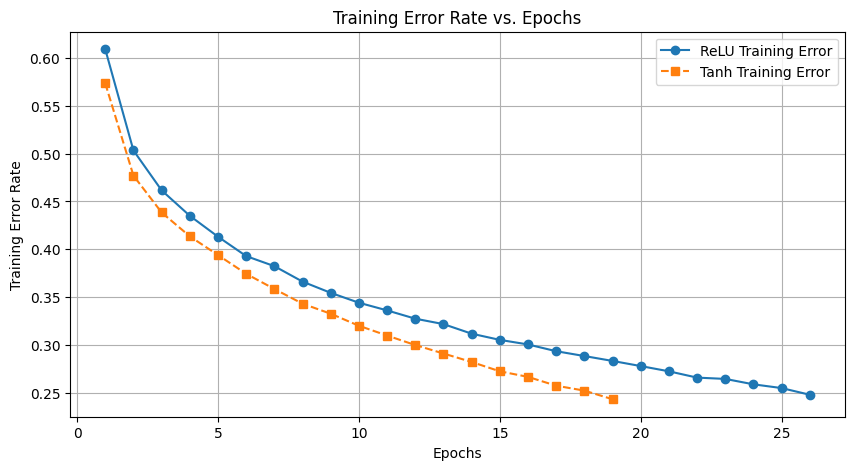

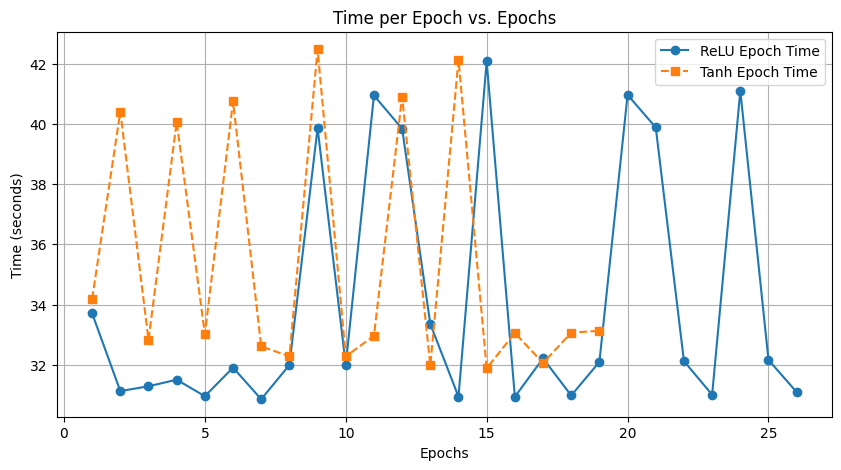

In [5]:
# Create x-axis values (number of epochs)
relu_epochs = range(1, len(relu_errors) + 1)
tanh_epochs = range(1, len(tanh_errors) + 1)

# Graph 1: Training Error Rate vs. Epochs [cite: 17]
plt.figure(figsize=(10, 5))
plt.plot(relu_epochs, relu_errors, 'o-', label='ReLU Training Error')
plt.plot(tanh_epochs, tanh_errors, 's--', label='Tanh Training Error')
plt.title('Training Error Rate vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Error Rate')
plt.grid(True)
plt.legend()
plt.show()

# Graph 2: Time per Epoch vs. Epochs [cite: 30, 31]
plt.figure(figsize=(10, 5))
plt.plot(relu_epochs, relu_times, 'o-', label='ReLU Epoch Time')
plt.plot(tanh_epochs, tanh_times, 's--', label='Tanh Epoch Time')
plt.title('Time per Epoch vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()

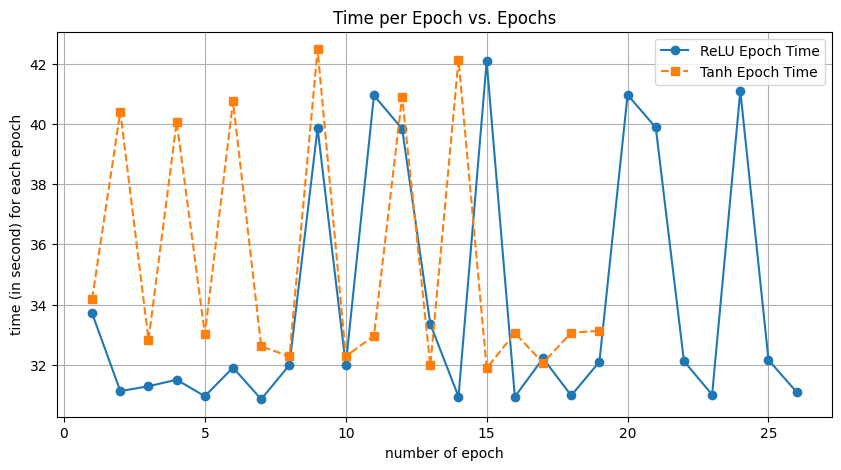

In [6]:
import matplotlib.pyplot as plt

# --- Assume you have these lists from the training step ---
# relu_errors, relu_times
# tanh_errors, tanh_times

# Create x-axis values (number of epochs) for both experiments
relu_epochs = range(1, len(relu_times) + 1)
tanh_epochs = range(1, len(tanh_times) + 1)


# --- Code to generate the required plot ---

plt.figure(figsize=(10, 5)) # Create a figure to plot on

# Plot the ReLU results
plt.plot(relu_epochs, relu_times, 'o-', label='ReLU Epoch Time')

# Plot the Tanh results on the SAME figure
plt.plot(tanh_epochs, tanh_times, 's--', label='Tanh Epoch Time')

# Set the labels according to the assignment's instructions
plt.title('Time per Epoch vs. Epochs')
plt.xlabel('number of epoch') # Sets the x-axis label
plt.ylabel('time (in second) for each epoch') # Sets the y-axis label

plt.grid(True)
plt.legend()
plt.show()